In [1]:
import block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load a monodimensional array as input for the blocking function 
dataset = np.loadtxt('test_cv.dat')

In [3]:
# The blocking function returns a 3 columns array
blocks_stat = block.blocking(dataset)

# Printing blocking result as dataframe for a nicer view
pd.DataFrame(blocks_stat, columns=['Block Size', 'Std Error(Mean)', 'Std Error(Std Error)']).style.hide_index()

Block Size,Std Error(Mean),Std Error(Std Error)
1,0.00352024,1.90917e-05
2,0.00493151,3.78252e-05
4,0.00679874,7.37514e-05
5,0.00748679,9.0804e-05
8,0.00902905,0.000138532
10,0.00977695,0.000167723
17,0.0112817,0.000252392
20,0.0121005,0.000293654
25,0.0122753,0.000333107
34,0.0130138,0.000411945


<ErrorbarContainer object of 3 artists>

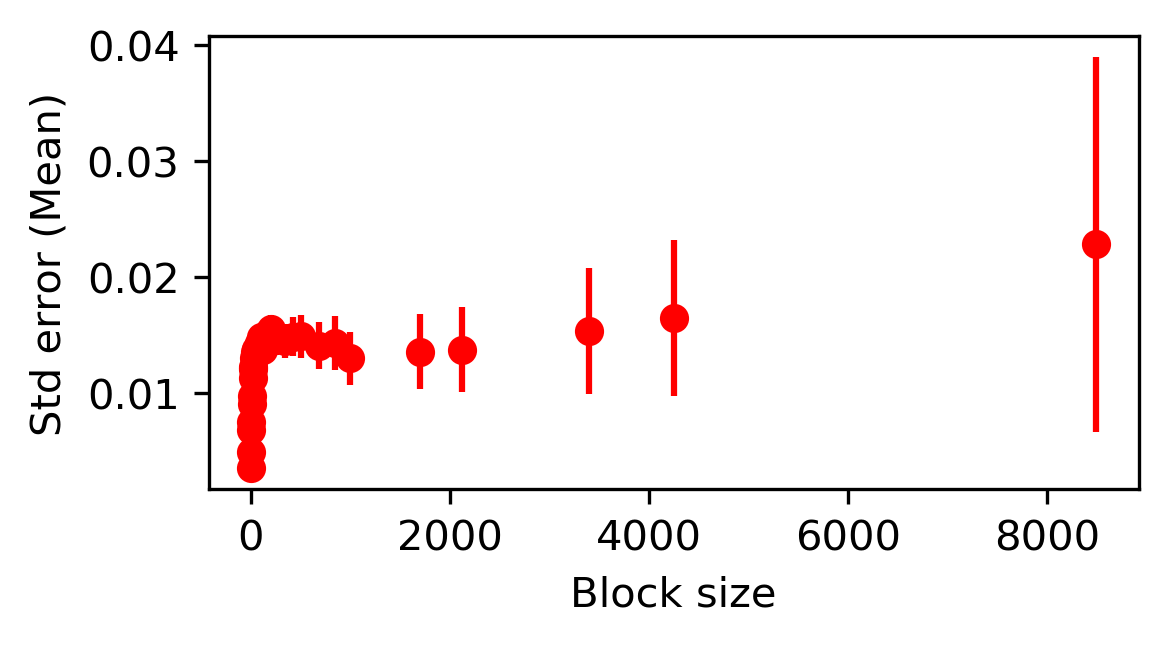

In [4]:
# Plotting the blocking result
plt.fig = plt.figure(figsize=(4, 2), dpi=300)
plt.xlabel('Block size')
plt.ylabel('Std error (Mean)')
plt.errorbar(blocks_stat[...,0],blocks_stat[...,1],blocks_stat[...,2],fmt='ro',)

In [5]:
# Predicting the correlation lenght and the associated error
corr_len, err = block.optimal_block(len(dataset),blocks_stat)
print("Correlation length: %i" %(corr_len))
print("Mean of the dataset: %f" %(dataset.mean()))
print("Error on the mean: %f" %(err))

Correlation length: 250
Mean of the dataset: 2.161809
Error on the mean: 0.014552


Text(500, 0.03, 'Correlation length')

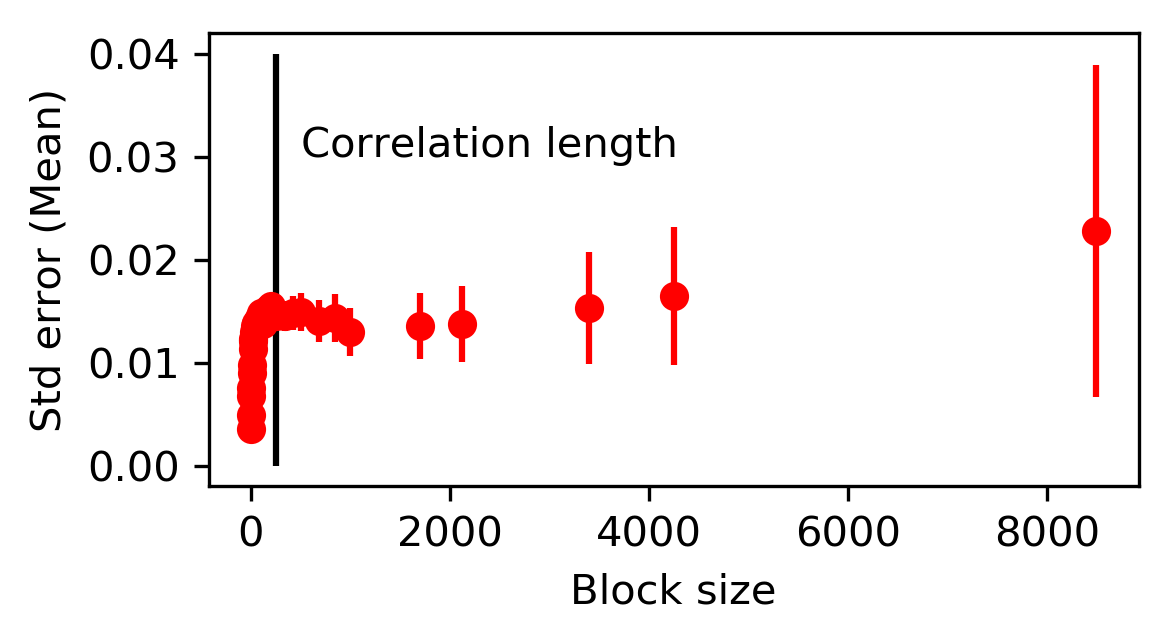

In [6]:
plt.fig = plt.figure(figsize=(4, 2), dpi=300)
plt.xlabel('Block size')
plt.ylabel('Std error (Mean)')
plt.errorbar(blocks_stat[...,0],blocks_stat[...,1],blocks_stat[...,2],fmt='ro',)
plt.vlines(corr_len,0,0.04)
plt.text(500,0.03,'Correlation length')